# **1**

First 5 rows of the dataset:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset statistics:
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.8000

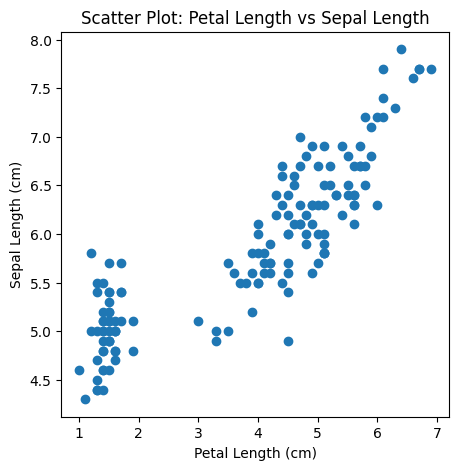

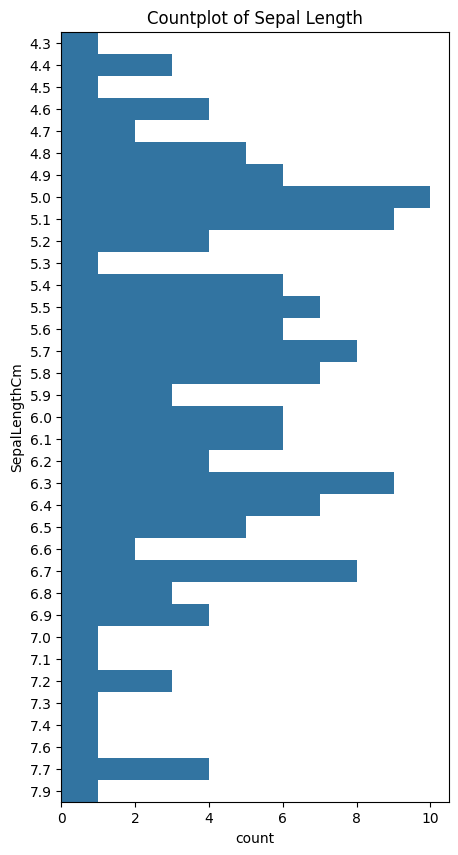

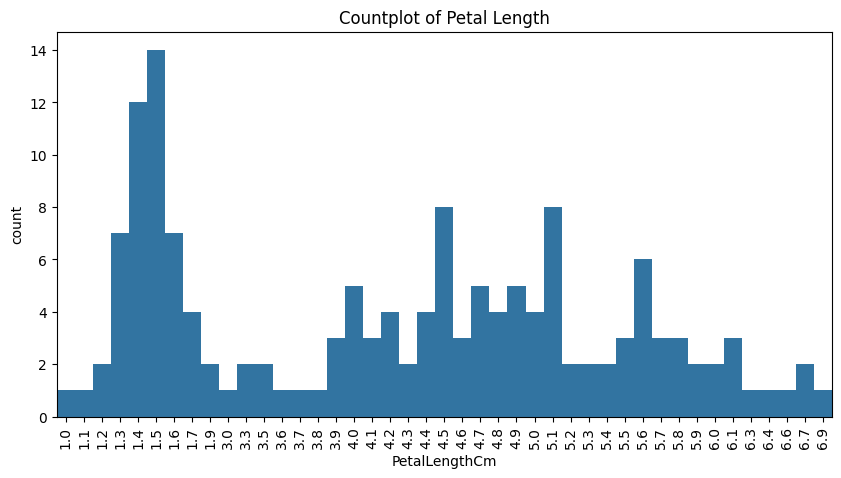

Correlation between Petal Length and Sepal Length: 0.87


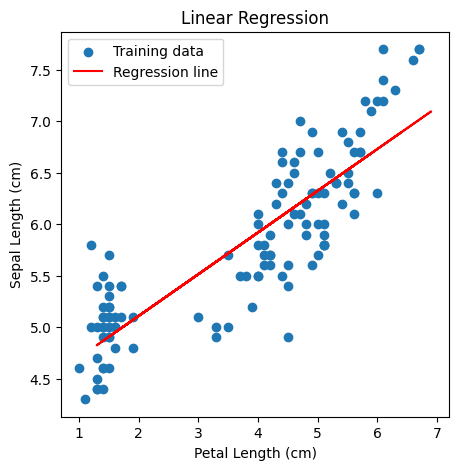

Intercept of the sklearn Iris model: 6.53
Slope (Coefficient) of the sklearn Iris model: -0.22


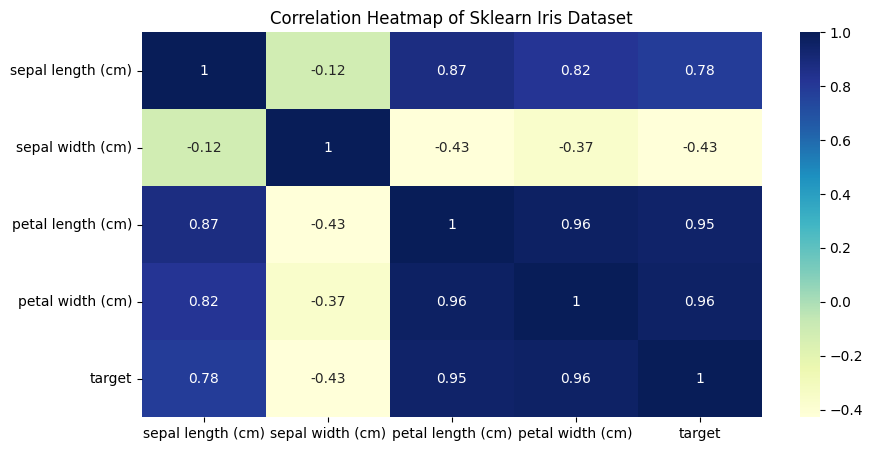

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the CSV file
df = pd.read_csv("/content/Iris.csv")

# Display the first 5 rows and basic statistics
print("First 5 rows of the dataset:\n", df.head())
print("\nDataset statistics:\n", df.describe())

# Check data types and missing values
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Display column names
print("\nColumn Names:\n", df.columns)

# Drop unwanted columns using correct column names in the dataset
columns_to_drop = ['SepalWidthCm', 'PetalWidthCm', 'Species']
df = df.drop(columns=columns_to_drop)

# Define features and target variables
x = df['PetalLengthCm']
y = df['SepalLengthCm']

# Scatter Plot: Petal Length vs. Sepal Length
plt.figure(figsize=[5, 5])
plt.scatter(x, y)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title("Scatter Plot: Petal Length vs Sepal Length")
plt.show()

# Countplot for Sepal Length
plt.figure(figsize=(5, 10))
sns.countplot(y=y, width=1.0)
plt.title("Countplot of Sepal Length")
plt.show()

# Countplot for Petal Length
plt.figure(figsize=(10, 5))
sns.countplot(x=x, width=1)
plt.xticks(rotation=90)
plt.title("Countplot of Petal Length")
plt.show()

# Calculate and display correlation
correlation = np.corrcoef(x, y)[0, 1]
print(f"Correlation between Petal Length and Sepal Length: {correlation:.2f}")

# Reshape x for linear regression
x_reshape = x.values.reshape(-1, 1)

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_reshape, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

# Plotting the Linear Regression
plt.figure(figsize=[5, 5])
plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_test, y_pred, color='red', label='Regression line')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title("Linear Regression")
plt.legend()
plt.show()

# Load sklearn Iris dataset
iris = load_iris()

# Create a DataFrame from the sklearn Iris dataset
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

# Linear Regression on sklearn Iris dataset
X = df_iris[['sepal width (cm)']].values
y = df_iris['sepal length (cm)'].values
model = LinearRegression()
model.fit(X, y)

# Display intercept and slope
slope = model.coef_[0]
intercept = model.intercept_
print(f"Intercept of the sklearn Iris model: {intercept:.2f}")
print(f"Slope (Coefficient) of the sklearn Iris model: {slope:.2f}")

# Heatmap of the correlations in sklearn Iris dataset
plt.figure(figsize=[10, 5])
sns.heatmap(data=df_iris.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap of Sklearn Iris Dataset")
plt.show()

# **2**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Apply one-hot encoding to the 'species' column
iris_encoded = pd.get_dummies(iris, columns=['species'], drop_first=True)

# Print the first few rows to check the encoding
print(iris_encoded.head())

# Prepare data for regression
X = iris_encoded.drop(columns=['sepal_length'])  # Features
y = iris_encoded['sepal_length']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model with bias
model_with_bias = LinearRegression(fit_intercept=True)
model_with_bias.fit(X_train, y_train)

# Predict and calculate MSE
y_pred_with_bias = model_with_bias.predict(X_test)
mse_with_bias = mean_squared_error(y_test, y_pred_with_bias)

# Create and fit the linear regression model without bias
model_without_bias = LinearRegression(fit_intercept=False)
model_without_bias.fit(X_train, y_train)
y_pred_without_bias = model_without_bias.predict(X_test)

# Calculate MSE without bias
mse_without_bias = mean_squared_error(y_test, y_pred_without_bias)

# Print the MSE results
print(f'Mean Squared Error with Bias: {mse_with_bias}')
print(f'Mean Squared Error without Bias: {mse_without_bias}')

   sepal_length  sepal_width  petal_length  petal_width  species_versicolor  \
0           5.1          3.5           1.4          0.2               False   
1           4.9          3.0           1.4          0.2               False   
2           4.7          3.2           1.3          0.2               False   
3           4.6          3.1           1.5          0.2               False   
4           5.0          3.6           1.4          0.2               False   

   species_virginica  
0              False  
1              False  
2              False  
3              False  
4              False  
Mean Squared Error with Bias: 0.09211496169144932
Mean Squared Error without Bias: 0.15068072875073688


# **3**

In [ ]:
import gensim.downloader as api
import numpy as np

# Load the Word2Vec pre-trained model
model = api.load('word2vec-google-news-300')

# Word Analogy Task
word_a, word_b, word_c = 'delhi', 'india', 'colombo'
result = model.most_similar(positive=[word_b, word_c], negative=[word_a], topn=1)
word_d = result[0][0]
print(f"{word_a} is to {word_b} as {word_c} is to {word_d}")
print(f"Word: {word_d}, Similarity: {result[0][1]}")

# Extract vectors for the analogy words
words = [word_a, word_b, word_c, word_d]
word_vectors = np.array([model[word] for word in words])
for i, word in enumerate(words):
    print(f"Vector for '{word}': {word_vectors[i]}")

# Paragraph and Key Term Similarity Check
paragraph = """
Diwali is India’s most important festival of the year—a time to celebrate
the triumph of light over darkness, knowledge over ignorance, and good over evil.
Widely observed among more than a billion people from a variety of faiths
across India and its diaspora, the five days of Diwali are marked by prayer,
feasts, fireworks, family gatherings, and charitable giving.
For some, Diwali is also the beginning of a new year.
"""

words_in_paragraph = paragraph.lower().split()
key_terms = ['celebrate', 'prayers', 'fireworks', 'diaspora']

for term in key_terms:
    if term in model:
        similar_words = model.most_similar(term, topn=5)
        print(f"\nWords similar to '{term}':")
        for word, similarity in similar_words:
            print(f"{word}: {similarity}")
    else:
        print(f"'{term}' not found in the model.\n")


[==================================================] 100.0% 1662.8/1662.8MB downloaded
delhi is to india as colombo is to sri_lanka
Word: sri_lanka, Similarity: 0.5586314797401428
Vector for 'delhi': [-0.45507812  0.0213623   0.23925781  0.5625     -0.05444336 -0.20898438
 -0.21484375 -0.12988281 -0.3046875   0.12597656  0.17773438 -0.10253906
 -0.11767578 -0.44335938  0.11816406  0.03637695  0.05371094 -0.01531982
  0.22753906 -0.0859375  -0.30664062 -0.40234375  0.19824219 -0.12255859
 -0.10302734  0.10107422 -0.34375     0.05053711 -0.0324707   0.04248047
  0.12695312 -0.10595703 -0.12158203  0.09326172 -0.25390625 -0.05957031
 -0.41992188 -0.03881836  0.33203125 -0.11816406 -0.22949219 -0.03613281
  0.12353516  0.41796875  0.04052734 -0.3671875   0.02258301  0.00439453
 -0.10693359  0.24023438 -0.08447266  0.20019531  0.40429688  0.10253906
 -0.34375    -0.01538086 -0.41015625 -0.18164062 -0.04589844 -0.37109375
  0.12988281 -0.10839844 -0.2890625  -0.06494141 -0.00769043  0.031982

# **4**

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target != 0).astype(int)  # Binary classification (setosa vs non-setosa)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Perceptron WITHOUT bias
perceptron_no_bias = Perceptron(fit_intercept=False, random_state=42)
perceptron_no_bias.fit(X_train, y_train)

# Predictions and evaluation
y_pred_no_bias = perceptron_no_bias.predict(X_test)
accuracy_no_bias = accuracy_score(y_test, y_pred_no_bias)

# Train Perceptron WITH bias
perceptron_with_bias = Perceptron(fit_intercept=True, random_state=42)
perceptron_with_bias.fit(X_train, y_train)

# Predictions and evaluation
y_pred_with_bias = perceptron_with_bias.predict(X_test)
accuracy_with_bias = accuracy_score(y_test, y_pred_with_bias)

# Print the results
print(f"Accuracy without bias: {accuracy_no_bias:.2f}")
print(f"Accuracy with bias: {accuracy_with_bias:.2f}")

Accuracy without bias: 0.98
Accuracy with bias: 1.00


# **5**

Class distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Imbalance Ratio (Largest class / Smallest class): 1.00

The dataset is balanced.


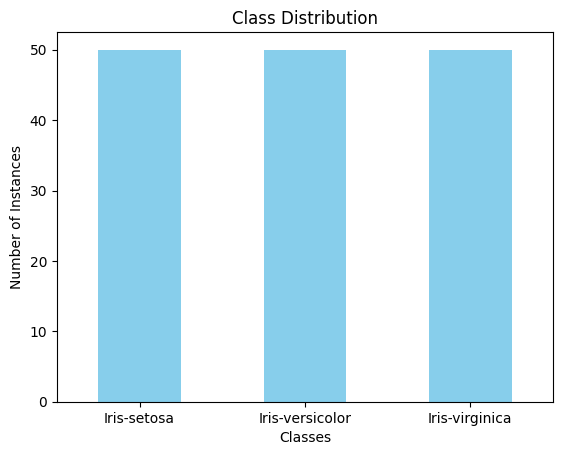

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def check_imbalance(dataset_path, target_column):
    # Load the dataset
    data = pd.read_csv(dataset_path)

    # Compute class counts
    class_counts = data[target_column].value_counts()

    # Calculate imbalance ratio
    max_count = class_counts.max()
    min_count = class_counts.min()
    imbalance_ratio = max_count / min_count

    # Display class distribution and imbalance ratio
    print('Class distribution:\n', class_counts)
    print(f"\nImbalance Ratio (Largest class / Smallest class): {imbalance_ratio:.2f}")

    # Interpret the imbalance
    if imbalance_ratio > 2:
        print("\nThe dataset is highly imbalanced.")
    else:
        print("\nThe dataset is balanced.")

    # Plot class distribution
    class_counts.plot(kind='bar', color='skyblue')
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Number of Instances')
    plt.xticks(rotation=0)
    plt.show()

# Use the 'Species' column for imbalance checking in the Iris dataset
dataset_path = 'Iris.csv'
target_column = 'Species'  # Correct column for categorical data
check_imbalance(dataset_path, target_column)

# **6**

In [4]:
import pandas as pd
import random

def anonymize_dataset(df, pii_columns, mask=False):
    if mask:
        for col in pii_columns:
            if col in df.columns:
                df[col] = [f"{col}_{random.randint(1000, 9999)}" for _ in range(len(df))]
    else:
        df = df.drop(columns=pii_columns, errors='ignore')

    return df

data = {
    'Name': ['Alice Johnson', 'Bob Smith', 'Charlie Brown'],
    'Email': ['alice@example.com', 'bob@example.com', 'charlie@example.com'],
    'Age': [28, 34, 45],
    'Location': ['New York', 'Los Angeles', 'Chicago']
}

sample_df = pd.DataFrame(data)

pii_columns = ['Name', 'Email']

anonymized_masked_df = anonymize_dataset(sample_df, pii_columns, mask=True)
print("Masked Anonymized Dataset:")
print(anonymized_masked_df)

anonymized_dropped_df = anonymize_dataset(sample_df, pii_columns, mask=False)
print("\nDropped PII Columns Dataset:")
print(anonymized_dropped_df)

Masked Anonymized Dataset:
        Name       Email  Age     Location
0  Name_8891  Email_6072   28     New York
1  Name_8941  Email_5371   34  Los Angeles
2  Name_5910  Email_2793   45      Chicago

Dropped PII Columns Dataset:
   Age     Location
0   28     New York
1   34  Los Angeles
2   45      Chicago


# **07**

In [5]:
import pandas as pd

file_path = '/content/sample_logs_1.csv'
logs_df = pd.read_csv(file_path)

def detect_anomalies(logs_df, threshold):
    anomalies = logs_df[logs_df['error_rate'] > threshold]
    return anomalies

threshold_value = 0.05

anomalies = detect_anomalies(logs_df, threshold_value)

print(anomalies)


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_logs_1.csv'

# **08**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

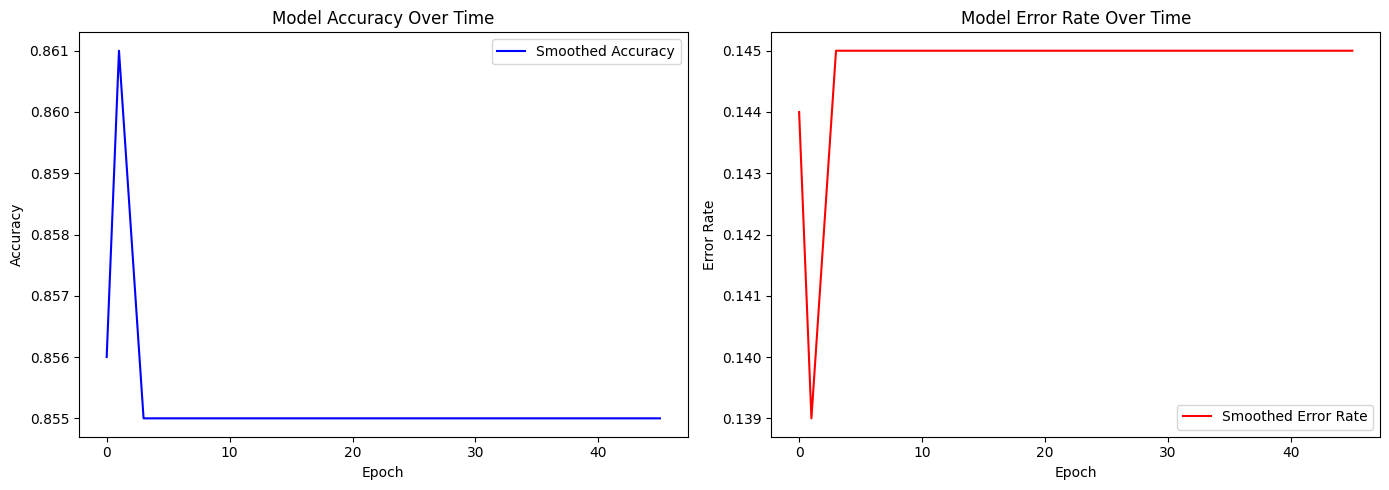

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def calculate_sma(data, window_size):
    sma = np.convolve(data, np.ones(window_size) / window_size, mode='valid')
    return sma

def plot_performance_metrics(epochs, accuracy_list, error_rate_list, window_size=5):
    accuracy_sma = calculate_sma(accuracy_list, window_size)
    error_rate_sma = calculate_sma(error_rate_list, window_size)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(accuracy_sma)), accuracy_sma, label="Smoothed Accuracy", color='blue')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy Over Time")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(len(error_rate_sma)), error_rate_sma, label="Smoothed Error Rate", color='red')
    plt.xlabel("Epoch")
    plt.ylabel("Error Rate")
    plt.title("Model Error Rate Over Time")
    plt.legend()

    plt.tight_layout()
    plt.show()

def train_and_monitor_model(epochs=50, window_size=5):
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1, warm_start=True)

    accuracy_list = []
    error_rate_list = []

    for epoch in range(epochs):
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        error_rate = 1 - accuracy

        accuracy_list.append(accuracy)
        error_rate_list.append(error_rate)

    plot_performance_metrics(epochs, accuracy_list, error_rate_list, window_size=window_size)

train_and_monitor_model(epochs=50, window_size=5)


# **9**

In [7]:
import logging
import random
import time

# Set up logging configuration
logging.basicConfig(
    filename='system_log.txt',
    level=logging.INFO,
    format='%(asctime)s %(levelname)s:%(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)

class AISystem:
    def __init__(self):
        # Initialize the system with zero load
        self.load = 0.0

    def update_load(self):
        # Randomly update the load level between 0 (idle) and 1 (max)
        self.load = random.uniform(0, 1)
        return self.load

def monitor_system(ai_system, threshold=0.8):
    # Get current load from the AI system
    current_load = ai_system.update_load()

    # Check if the current load exceeds the threshold
    if current_load >= threshold:
        # Fail-safe action is triggered
        message = f"Fail-safe triggered due to high load: {current_load:.2f}"
        logging.info(message)
        print(message)
    else:
        # System is operating normally
        message = f"System operating normally. Current load: {current_load:.2f}"
        logging.info(message)
        print(message)

# Create an instance of the AI system
ai_system = AISystem()

# Simulate continuous monitoring
for _ in range(10):
    monitor_system(ai_system)
    time.sleep(2)  # Sleep for 2 seconds to simulate time between checks

System operating normally. Current load: 0.26
System operating normally. Current load: 0.48
System operating normally. Current load: 0.27
System operating normally. Current load: 0.65
System operating normally. Current load: 0.80
Fail-safe triggered due to high load: 0.93
System operating normally. Current load: 0.17
System operating normally. Current load: 0.44
System operating normally. Current load: 0.33
System operating normally. Current load: 0.02


# **10**

In [9]:
# Step 1: Install the necessary library (you can run this command outside the script if needed)
!pip install fairlearn scikit-learn

# Step 2: Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import MetricFrame, selection_rate

# Step 3: Create a synthetic dataset with bias
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
# Simulate a sensitive feature (e.g., gender), with a 30/70 split
gender = np.random.binomial(1, 0.3, size=1000)

# Step 4: Split the dataset into training and test sets
X_train, X_test, y_train, y_test, gender_train, gender_test = train_test_split(
    X, y, gender, test_size=0.3, random_state=42)

# Step 5: Train a model on the original dataset
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Evaluate the model on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the original model:", accuracy)

# Step 7: Calculate fairness metrics (e.g., selection rate across sensitive groups)
mf = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_pred, sensitive_features=gender_test)
print("Selection rate across sensitive groups:")
print(mf.by_group)

# Optional: Apply a fairness method to mitigate bias (using Reweighing or another method like ExponentiatedGradient)
constraint = DemographicParity()
mitigator = ExponentiatedGradient(estimator=clf, constraints=constraint)
mitigator.fit(X_train, y_train, sensitive_features=gender_train)
y_pred_mitigated = mitigator.predict(X_test)

# Evaluate and print fairness metrics for the mitigated model
accuracy_mitigated = accuracy_score(y_test, y_pred_mitigated)
print("Accuracy of the mitigated model:", accuracy_mitigated)

mf_mitigated = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=gender_test)
print("Selection rate across sensitive groups (mitigated):")
print(mf_mitigated.by_group)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 4.0 MB/s eta 0:00:00
Accuracy of the original model: 0.8566666666666667
Selection rate across sensitive groups:
sensitive_feature_0
0    0.476636
1    0.488372
Name: selection_rate, dtype: float64
Accuracy of the mitigated model: 0.82
Selection rate across sensitive groups (mitigated):
sensitive_feature_0
0    0.411215
1    0.453488
Name: selection_rate, dtype: float64


# **11**

In [10]:
import pandas as pd
import random

# Function to generate a dataset
def generate_dataset(num_records=1000):
    data = {
        "CustomerID": list(range(1, num_records + 1)),
        "Gender": random.choices(["Male", "Female"], k=num_records),
        "Age": [random.randint(18, 65) for _ in range(num_records)],
        "AnnualIncome": [random.randint(20000, 120000) for _ in range(num_records)],
    }
    return pd.DataFrame(data)

# Function to check for gender bias
def check_gender_bias(dataset):
    # Calculate the gender distribution
    gender_counts = dataset["Gender"].value_counts()
    total_records = len(dataset)

    # Print the gender distribution
    print("Gender Distribution:")
    print(gender_counts)

    # Calculate the percentages
    male_percentage = (gender_counts.get("Male", 0) / total_records) * 100
    female_percentage = (gender_counts.get("Female", 0) / total_records) * 100

    # Print the percentages
    print(f"\nMale Percentage: {male_percentage:.2f}%")
    print(f"Female Percentage: {female_percentage:.2f}%")

    # Check for significant imbalance
    if abs(male_percentage - female_percentage) > 20:
        print("\nSignificant imbalance in gender distribution detected!")
    else:
        print("\nThe gender distribution is balanced.")

# Generate the dataset
customer_data = generate_dataset()

# Check for gender bias
check_gender_bias(customer_data)

Gender Distribution:
Gender
Male      518
Female    482
Name: count, dtype: int64

Male Percentage: 51.80%
Female Percentage: 48.20%

The gender distribution is balanced.
